# Cohort Analysis using Online Retail Dataset from UCI

![Cohort Analysis](http://d35fo82fjcw0y8.cloudfront.net/2016/03/03210554/table1a2.png)

## Imports

In [365]:
from fastai.basics import *
from nlphero.data.external import *
import sklearn as sk
import bqplot as bq
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy import stats
from ipywidgets import interact, interactive

import warnings



In [332]:
%matplotlib inline

warnings.filterwarnings("ignore")

## Read the Data

In [157]:
# kaggle datasets download -d jihyeseo/online-retail-data-set-from-uci-ml-repo
path = untar_data("kaggle_datasets::jihyeseo/online-retail-data-set-from-uci-ml-repo"); path

Path('/Landmark2/pdo/.nlphero/data/online-retail-data-set-from-uci-ml-repo')

In [158]:
path.ls()

(#1) [Path('/Landmark2/pdo/.nlphero/data/online-retail-data-set-from-uci-ml-repo/Online Retail.xlsx')]

In [159]:
df = pd.read_excel(path/"Online Retail.xlsx", parse_dates=['InvoiceDate'])

In [160]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [162]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [163]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## Data Cleaning

In [164]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [165]:
df[df.duplicated()]

InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom  
527    2010-12-01 11:45:00       2.10     17908.0  United Kingdom  
537    2010-12-01 11:45:00       2.95     17908.0  United Kingdom  
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom  
555    2010-12-01 11:49:00       2.95     17920.0  United Kingdom  
...                    ...        ...         ...             ...  
541675 2011-12-09 11:34:00       0.39     14446.0  United Kingdom  
541689 2011-12-09 11:34:00       2.49     14446.0  United Kingdom  
541692 2011-12-09 11:34:00       1.95     14446.0  United Kingdom  
541699 2011-12-09 11:34:00       2.10     14446.0  United Kingdom  
541701 2011-12-09 11:34:00       2.08     14446.0  United Kingdom  

[5268 rows x 8 columns]

### Remove null and duplicates

In [166]:
df =df[~df.isnull()];
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [167]:
# df = df[~df.duplicated()]
df = df.drop_duplicates();
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[536641 rows x 8 columns]

In [168]:
df[df.isnull()].sum()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [169]:
df[df.duplicated()]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [337]:
df.loc[:,'CustomerID'] = df['CustomerID'].astype('category').values
df.describe()

Quantity      UnitPrice    CohortIndex       TotalSum
count  524878.000000  524878.000000  392692.000000  524878.000000
mean       10.616600       3.922573       5.147599      20.275399
std       156.280031      36.093028       3.850198     271.693566
min         1.000000       0.001000       1.000000       0.001000
25%         1.000000       1.250000       1.000000       3.900000
50%         4.000000       2.080000       4.000000       9.920000
75%        11.000000       4.130000       8.000000      17.700000
max     80995.000000   13541.330000      13.000000  168469.600000

```{warning}

- Some negative values for minimum, need to remove more rows.
```

### Remove Negative Quantities and Unit Price

In [171]:
df[df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice CustomerID         Country  
141    2010-12-01 09:41:00      27.50    14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65    15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65    17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29    17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29    17548.0  United Kingdom  
...                    ...        ...        ...             ...  
540449 2011-12-09 09:57:00       0.83    14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69    15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95    15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25    17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25    17315.0  United Kingdom  

[10587 rows x 8 columns]

In [172]:
df[df['UnitPrice']<0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice CustomerID         Country  
299983  -11062.06        NaN  United Kingdom  
299984  -11062.06        NaN  United Kingdom

In [173]:
df[(df['Quantity']>0)&(df['UnitPrice']>0)]

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
...                    ...        ...        ...             ...  
541904 2011-12-09 12:50:00       0.85    12680.0          France  
541905 2011-12-09 12:50:00       2.10    12680.0          France  
541906 2011-12-09 12:50:00       4.15    12680.0          France  
541907 2011-12-09 12:50:00       4.15    12680.0          France  
541908 2011-12-09 12:50:00       4.95    12680.0          France  

[524878 rows x 8 columns]

In [174]:
df = df[(df['Quantity']>0)&(df['UnitPrice']>0)]; df.describe()

Quantity      UnitPrice
count  524878.000000  524878.000000
mean       10.616600       3.922573
std       156.280031      36.093028
min         1.000000       0.001000
25%         1.000000       1.250000
50%         4.000000       2.080000
75%        11.000000       4.130000
max     80995.000000   13541.330000

In [175]:
df.shape

(524878, 8)

In [176]:
df.groupby('CustomerID').count()

InvoiceNo  StockCode  Description  Quantity  InvoiceDate  \
CustomerID                                                             
12346.0             1          1            1         1            1   
12347.0           182        182          182       182          182   
12348.0            31         31           31        31           31   
12349.0            73         73           73        73           73   
12350.0            17         17           17        17           17   
...               ...        ...          ...       ...          ...   
18280.0            10         10           10        10           10   
18281.0             7          7            7         7            7   
18282.0            12         12           12        12           12   
18283.0           721        721          721       721          721   
18287.0            70         70           70        70           70   

            UnitPrice  Country  
CustomerID                      
12346.0             1        1  
12347.0           182      182  
12348.0            31       31  
12349.0            73       73  
12350.0            17       17  
...               ...      ...  
18280.0            10       10  
18281.0             7        7  
18282.0            12       12  
18283.0           721      721  
18287.0            70       70  

[4372 rows x 7 columns]

In [177]:
# df.groupby(['CustomerID', 'InvoiceNo']).count()
df.nunique()

InvoiceNo      19960
StockCode       3922
Description     4026
Quantity         375
InvoiceDate    18499
UnitPrice       1291
CustomerID      4338
Country           38
dtype: int64

In [178]:
df[df['CustomerID']==12347.0]

InvoiceNo StockCode                          Description  Quantity  \
14938     537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
14939     537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
14940     537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
14941     537626     22492              MINI PAINT SET VINTAGE         36   
14942     537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
...          ...       ...                                  ...       ...   
535010    581180     20719               WOODLAND CHARLOTTE BAG        10   
535011    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
535012    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
535013    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
535014    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   

               InvoiceDate  UnitPrice CustomerID  Country  
14938  2010-12-07 14:57:00       2.10    12347.0  Iceland  
14939  2010-12-07 14:57:00       4.25    12347.0  Iceland  
14940  2010-12-07 14:57:00       3.25    12347.0  Iceland  
14941  2010-12-07 14:57:00       0.65    12347.0  Iceland  
14942  2010-12-07 14:57:00       1.25    12347.0  Iceland  
...                    ...        ...        ...      ...  
535010 2011-12-07 15:52:00       0.85    12347.0  Iceland  
535011 2011-12-07 15:52:00       1.95    12347.0  Iceland  
535012 2011-12-07 15:52:00       0.83    12347.0  Iceland  
535013 2011-12-07 15:52:00       0.42    12347.0  Iceland  
535014 2011-12-07 15:52:00       0.42    12347.0  Iceland  

[182 rows x 8 columns]

## Cohort Analysis

```{note}

- Group of subjects sharing defining characteristics
- Observe across time
- Compare with other cohorts
- Areas to perform a cross-section(compare difference across subjects) at interval through time
- Type of cohorts

    - Time Cohorts
        - Customer who signed up for a product or service during a particular time frame.
        - Analysis -> Customer behaviour at time of purchase[ monthly, quaterly or daily]
        
    - Behaviour Cohorts
        - Customer who purchased a kind of product or subscribed to a behaviour
        - Understanding needs [ Basic or Advanced based on signup]
        - Custom Made services for a particular segment
        
    - Size Cohorts
        - Various sizes of customers who purchase products or services
        - Amount of spending in some periodic time afer acquisition
        - Product type that customer most of their order amount in some period of time. 
 ```       

### Making Cohort Analysis

We need to create labels 
- Invoice period - Year & month of a single transaction
- Cohort group - Year & month of customer first purchase
- Cohort period/ Cohort index - Customer stage in its lifetime(int). It is number of months passed since first purchase



### Code Construction on Sample

In [179]:
sample = df[df['CustomerID'].isin([12347.0, 18283.0, 18287.0])].reset_index(drop=True); sample

InvoiceNo StockCode                          Description  Quantity  \
0      537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
1      537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
2      537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
3      537626     22492              MINI PAINT SET VINTAGE         36   
4      537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
..        ...       ...                                  ...       ...   
968    581180     20719               WOODLAND CHARLOTTE BAG        10   
969    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
970    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
971    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
972    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   

            InvoiceDate  UnitPrice CustomerID  Country  
0   2010-12-07 14:57:00       2.10    12347.0  Iceland  
1   2010-12-07 14:57:00       4.25    12347.0  Iceland  
2   2010-12-07 14:57:00       3.25    12347.0  Iceland  
3   2010-12-07 14:57:00       0.65    12347.0  Iceland  
4   2010-12-07 14:57:00       1.25    12347.0  Iceland  
..                  ...        ...        ...      ...  
968 2011-12-07 15:52:00       0.85    12347.0  Iceland  
969 2011-12-07 15:52:00       1.95    12347.0  Iceland  
970 2011-12-07 15:52:00       0.83    12347.0  Iceland  
971 2011-12-07 15:52:00       0.42    12347.0  Iceland  
972 2011-12-07 15:52:00       0.42    12347.0  Iceland  

[973 rows x 8 columns]

In [180]:
# sample['InvoiceDate'][0]
x = sample['InvoiceDate'][0]

x.year, x.month, dt.datetime(x.year, x.month, 1)
# x

(2010, 12, datetime.datetime(2010, 12, 1, 0, 0))

In [181]:
sample['InvoiceMonth'] = sample['InvoiceDate']\
.apply(lambda x : dt.datetime(x.year, x.month, 1))

sample

InvoiceNo StockCode                          Description  Quantity  \
0      537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
1      537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
2      537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
3      537626     22492              MINI PAINT SET VINTAGE         36   
4      537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
..        ...       ...                                  ...       ...   
968    581180     20719               WOODLAND CHARLOTTE BAG        10   
969    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
970    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
971    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
972    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   

            InvoiceDate  UnitPrice CustomerID  Country InvoiceMonth  
0   2010-12-07 14:57:00       2.10    12347.0  Iceland   2010-12-01  
1   2010-12-07 14:57:00       4.25    12347.0  Iceland   2010-12-01  
2   2010-12-07 14:57:00       3.25    12347.0  Iceland   2010-12-01  
3   2010-12-07 14:57:00       0.65    12347.0  Iceland   2010-12-01  
4   2010-12-07 14:57:00       1.25    12347.0  Iceland   2010-12-01  
..                  ...        ...        ...      ...          ...  
968 2011-12-07 15:52:00       0.85    12347.0  Iceland   2011-12-01  
969 2011-12-07 15:52:00       1.95    12347.0  Iceland   2011-12-01  
970 2011-12-07 15:52:00       0.83    12347.0  Iceland   2011-12-01  
971 2011-12-07 15:52:00       0.42    12347.0  Iceland   2011-12-01  
972 2011-12-07 15:52:00       0.42    12347.0  Iceland   2011-12-01  

[973 rows x 9 columns]

In [182]:
sample.groupby('CustomerID')['InvoiceMonth'].transform('min')

0     2010-12-01
1     2010-12-01
2     2010-12-01
3     2010-12-01
4     2010-12-01
         ...    
968   2010-12-01
969   2010-12-01
970   2010-12-01
971   2010-12-01
972   2010-12-01
Name: InvoiceMonth, Length: 973, dtype: datetime64[ns]

In [183]:
sample['CohortMonth']= sample.groupby('CustomerID')['InvoiceMonth'].transform('min')
sample

InvoiceNo StockCode                          Description  Quantity  \
0      537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
1      537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
2      537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
3      537626     22492              MINI PAINT SET VINTAGE         36   
4      537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
..        ...       ...                                  ...       ...   
968    581180     20719               WOODLAND CHARLOTTE BAG        10   
969    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
970    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
971    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
972    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   

            InvoiceDate  UnitPrice CustomerID  Country InvoiceMonth  \
0   2010-12-07 14:57:00       2.10    12347.0  Iceland   2010-12-01   
1   2010-12-07 14:57:00       4.25    12347.0  Iceland   2010-12-01   
2   2010-12-07 14:57:00       3.25    12347.0  Iceland   2010-12-01   
3   2010-12-07 14:57:00       0.65    12347.0  Iceland   2010-12-01   
4   2010-12-07 14:57:00       1.25    12347.0  Iceland   2010-12-01   
..                  ...        ...        ...      ...          ...   
968 2011-12-07 15:52:00       0.85    12347.0  Iceland   2011-12-01   
969 2011-12-07 15:52:00       1.95    12347.0  Iceland   2011-12-01   
970 2011-12-07 15:52:00       0.83    12347.0  Iceland   2011-12-01   
971 2011-12-07 15:52:00       0.42    12347.0  Iceland   2011-12-01   
972 2011-12-07 15:52:00       0.42    12347.0  Iceland   2011-12-01   

    CohortMonth  
0    2010-12-01  
1    2010-12-01  
2    2010-12-01  
3    2010-12-01  
4    2010-12-01  
..          ...  
968  2010-12-01  
969  2010-12-01  
970  2010-12-01  
971  2010-12-01  
972  2010-12-01  

[973 rows x 10 columns]

In [184]:
((sample['InvoiceMonth'] - sample['CohortMonth'])/(np.timedelta64(1, 'M'))).astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
968    11
969    11
970    11
971    11
972    11
Length: 973, dtype: int64

In [185]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(sample,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(sample,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month

year_diff * 12 + month_diff + 1 # , year_diff, month_diff

0       1
1       1
2       1
3       1
4       1
       ..
968    13
969    13
970    13
971    13
972    13
Length: 973, dtype: int64

In [186]:
(sample['InvoiceMonth'].dt.year - sample['CohortMonth'].dt.year)*12\
+(sample['InvoiceMonth'].dt.month - sample['CohortMonth'].dt.month)\
+1

0       1
1       1
2       1
3       1
4       1
       ..
968    13
969    13
970    13
971    13
972    13
Length: 973, dtype: int64

In [187]:
sample['CohortIndex'] = (sample['InvoiceMonth'].dt.year - sample['CohortMonth'].dt.year)*12\
+(sample['InvoiceMonth'].dt.month - sample['CohortMonth'].dt.month)\
+1

sample

InvoiceNo StockCode                          Description  Quantity  \
0      537626     85116      BLACK CANDELABRA T-LIGHT HOLDER        12   
1      537626     22375    AIRLINE BAG VINTAGE JET SET BROWN         4   
2      537626     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        12   
3      537626     22492              MINI PAINT SET VINTAGE         36   
4      537626     22771  CLEAR DRAWER KNOB ACRYLIC EDWARDIAN        12   
..        ...       ...                                  ...       ...   
968    581180     20719               WOODLAND CHARLOTTE BAG        10   
969    581180     21265         PINK GOOSE FEATHER TREE 60CM        12   
970    581180     23271  CHRISTMAS TABLE SILVER CANDLE SPIKE        16   
971    581180     23506         MINI PLAYING CARDS SPACEBOY         20   
972    581180     23508       MINI PLAYING CARDS DOLLY GIRL         20   

            InvoiceDate  UnitPrice CustomerID  Country InvoiceMonth  \
0   2010-12-07 14:57:00       2.10    12347.0  Iceland   2010-12-01   
1   2010-12-07 14:57:00       4.25    12347.0  Iceland   2010-12-01   
2   2010-12-07 14:57:00       3.25    12347.0  Iceland   2010-12-01   
3   2010-12-07 14:57:00       0.65    12347.0  Iceland   2010-12-01   
4   2010-12-07 14:57:00       1.25    12347.0  Iceland   2010-12-01   
..                  ...        ...        ...      ...          ...   
968 2011-12-07 15:52:00       0.85    12347.0  Iceland   2011-12-01   
969 2011-12-07 15:52:00       1.95    12347.0  Iceland   2011-12-01   
970 2011-12-07 15:52:00       0.83    12347.0  Iceland   2011-12-01   
971 2011-12-07 15:52:00       0.42    12347.0  Iceland   2011-12-01   
972 2011-12-07 15:52:00       0.42    12347.0  Iceland   2011-12-01   

    CohortMonth  CohortIndex  
0    2010-12-01            1  
1    2010-12-01            1  
2    2010-12-01            1  
3    2010-12-01            1  
4    2010-12-01            1  
..          ...          ...  
968  2010-12-01           13  
969  2010-12-01           13  
970  2010-12-01           13  
971  2010-12-01           13  
972  2010-12-01           13  

[973 rows x 11 columns]

In [188]:
sample_data = sample.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
sample_data

CohortMonth  CohortIndex  CustomerID
0   2010-12-01            1           1
1   2010-12-01            2           1
2   2010-12-01            5           1
3   2010-12-01            7           1
4   2010-12-01            9           1
5   2010-12-01           11           1
6   2010-12-01           13           1
7   2011-01-01            1           1
8   2011-01-01            2           1
9   2011-01-01            4           1
10  2011-01-01            5           1
11  2011-01-01            6           1
12  2011-01-01            7           1
13  2011-01-01            9           1
14  2011-01-01           10           1
15  2011-01-01           11           1
16  2011-01-01           12           1
17  2011-05-01            1           1
18  2011-05-01            6           1

In [189]:
sample_data.pivot(index='CohortMonth', 
                  columns='CohortIndex',
                  values='CustomerID')

CohortIndex   1    2    4    5    6    7    9    10   11   12   13
CohortMonth                                                       
2010-12-01   1.0  1.0  NaN  1.0  NaN  1.0  1.0  NaN  1.0  NaN  1.0
2011-01-01   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  NaN
2011-05-01   1.0  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN

### Actual Data

#### InvoiceMonth

In [190]:
df['InvoiceMonth'] = df['InvoiceDate']\
.apply(lambda x : dt.datetime(x.year, x.month, 1))

df

<ipython-input-190-52184b66dd0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate']\


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country InvoiceMonth  
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom   2010-12-01  
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01  
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom   2010-12-01  
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01  
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01  
...                    ...        ...        ...             ...          ...  
541904 2011-12-09 12:50:00       0.85    12680.0          France   2011-12-01  
541905 2011-12-09 12:50:00       2.10    12680.0          France   2011-12-01  
541906 2011-12-09 12:50:00       4.15    12680.0          France   2011-12-01  
541907 2011-12-09 12:50:00       4.15    12680.0          France   2011-12-01  
541908 2011-12-09 12:50:00       4.95    12680.0          France   2011-12-01  

[524878 rows x 9 columns]

#### CohortMonth

In [338]:
df['CohortMonth']= df.groupby('CustomerID')['InvoiceMonth'].transform('min'); df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country InvoiceMonth  \
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom   2010-12-01   
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom   2010-12-01   
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
...                    ...        ...        ...             ...          ...   
541904 2011-12-09 12:50:00       0.85    12680.0          France   2011-12-01   
541905 2011-12-09 12:50:00       2.10    12680.0          France   2011-12-01   
541906 2011-12-09 12:50:00       4.15    12680.0          France   2011-12-01   
541907 2011-12-09 12:50:00       4.15    12680.0          France   2011-12-01   
541908 2011-12-09 12:50:00       4.95    12680.0          France   2011-12-01   

       CohortMonth  CohortIndex  TotalSum  
0       2010-12-01          1.0     15.30  
1       2010-12-01          1.0     20.34  
2       2010-12-01          1.0     22.00  
3       2010-12-01          1.0     20.34  
4       2010-12-01          1.0     20.34  
...            ...          ...       ...  
541904  2011-08-01          5.0     10.20  
541905  2011-08-01          5.0     12.60  
541906  2011-08-01          5.0     16.60  
541907  2011-08-01          5.0     16.60  
541908  2011-08-01          5.0     14.85  

[524878 rows x 12 columns]

#### CohortIndex

In [335]:
df['CohortIndex'] = (df['InvoiceMonth'].dt.year - df['CohortMonth'].dt.year)*12\
+(df['InvoiceMonth'].dt.month - df['CohortMonth'].dt.month)\
+1

df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country InvoiceMonth  \
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom   2010-12-01   
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom   2010-12-01   
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
...                    ...        ...        ...             ...          ...   
541904 2011-12-09 12:50:00       0.85    12680.0          France   2011-12-01   
541905 2011-12-09 12:50:00       2.10    12680.0          France   2011-12-01   
541906 2011-12-09 12:50:00       4.15    12680.0          France   2011-12-01   
541907 2011-12-09 12:50:00       4.15    12680.0          France   2011-12-01   
541908 2011-12-09 12:50:00       4.95    12680.0          France   2011-12-01   

       CohortMonth  CohortIndex  TotalSum  
0       2010-12-01          1.0     15.30  
1       2010-12-01          1.0     20.34  
2       2010-12-01          1.0     22.00  
3       2010-12-01          1.0     20.34  
4       2010-12-01          1.0     20.34  
...            ...          ...       ...  
541904  2011-08-01          5.0     10.20  
541905  2011-08-01          5.0     12.60  
541906  2011-08-01          5.0     16.60  
541907  2011-08-01          5.0     16.60  
541908  2011-08-01          5.0     14.85  

[524878 rows x 12 columns]

In [198]:
# df.pivot(index='CohortMonth', 
#                   columns='CohortIndex',
# #                   values='Quantity')
         
df.duplicated().sum()

0

#### Retention Rate Table

In [208]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])\
[['CustomerID']].count().unstack()

In [209]:
cohort_counts

CustomerID                                                      \
CohortIndex       1.0      2.0     3.0      4.0     5.0      6.0      7.0    
CohortMonth                                                                  
2010-12-01     25670.0  10111.0  8689.0  11121.0  9628.0  11946.0  11069.0   
2011-01-01     10877.0   2191.0  3012.0   2290.0  3603.0   3214.0   2776.0   
2011-02-01      8826.0   1388.0  1909.0   2487.0  2266.0   2012.0   2241.0   
2011-03-01     11349.0   1421.0  2598.0   2372.0  2435.0   2103.0   2942.0   
2011-04-01      7185.0   1398.0  1284.0   1296.0  1343.0   2007.0   1869.0   
2011-05-01      6041.0   1075.0   906.0    917.0  1493.0   2329.0   1949.0   
2011-06-01      5646.0    905.0   707.0   1511.0  1738.0   2545.0    616.0   
2011-07-01      4938.0    501.0  1314.0   1336.0  1760.0    517.0      NaN   
2011-08-01      4818.0   1591.0  2831.0   2801.0   899.0      NaN      NaN   
2011-09-01      8225.0   2336.0  2608.0    862.0     NaN      NaN      NaN   
2011-10-01     11500.0   3499.0   869.0      NaN     NaN      NaN      NaN   
2011-11-01     10821.0   1100.0     NaN      NaN     NaN      NaN      NaN   
2011-12-01       961.0      NaN     NaN      NaN     NaN      NaN      NaN   

                                                                  
CohortIndex     8.0      9.0      10.0     11.0     12.0    13.0  
CohortMonth                                                       
2010-12-01   11312.0  11316.0  14098.0  13399.0  21677.0  7173.0  
2011-01-01    2844.0   3768.0   4987.0   6248.0   1334.0     NaN  
2011-02-01    2720.0   2940.0   2916.0    451.0      NaN     NaN  
2011-03-01    3528.0   4214.0    967.0      NaN      NaN     NaN  
2011-04-01    2130.0    513.0      NaN      NaN      NaN     NaN  
2011-05-01     764.0      NaN      NaN      NaN      NaN     NaN  
2011-06-01       NaN      NaN      NaN      NaN      NaN     NaN  
2011-07-01       NaN      NaN      NaN      NaN      NaN     NaN  
2011-08-01       NaN      NaN      NaN      NaN      NaN     NaN  
2011-09-01       NaN      NaN      NaN      NaN      NaN     NaN  
2011-10-01       NaN      NaN      NaN      NaN      NaN     NaN  
2011-11-01       NaN      NaN      NaN      NaN      NaN     NaN  
2011-12-01       NaN      NaN      NaN      NaN      NaN     NaN

In [212]:
cohort_size = cohort_counts.iloc[:,0];
cohort_size

CohortMonth
2010-12-01    25670.0
2011-01-01    10877.0
2011-02-01     8826.0
2011-03-01    11349.0
2011-04-01     7185.0
2011-05-01     6041.0
2011-06-01     5646.0
2011-07-01     4938.0
2011-08-01     4818.0
2011-09-01     8225.0
2011-10-01    11500.0
2011-11-01    10821.0
2011-12-01      961.0
Name: (CustomerID, 1.0), dtype: float64

In [253]:
retention = (cohort_counts.divide(cohort_size, axis=0)*100).round(3)
retention.columns = retention.columns.droplevel()
retention.index = retention.index.astype('str')

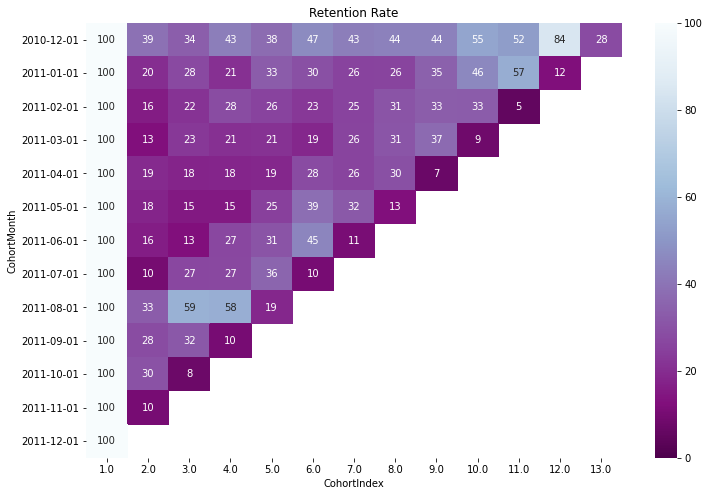

In [254]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.heatmap(data=retention, annot=True, fmt='0.0f', ax =ax, vmin = 0.0,vmax = 100,cmap="BuPu_r")
ax.set_title('Retention Rate')
plt.show()

In [255]:
# loc, labels = plt.xticks(); labels

In [256]:
# labels[0]

#### Average Quantity each cohort

In [258]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])\
[['Quantity']].mean().unstack()
cohort_counts.round(1)

Quantity                                                         \
CohortIndex     1.0   2.0   3.0   4.0   5.0   6.0   7.0    8.0   9.0   10.0   
CohortMonth                                                                   
2010-12-01      12.1  15.7  15.7  15.9  13.6  14.9  16.1   15.6  18.2  17.7   
2011-01-01      17.5  13.5  12.7  15.3  12.8  15.4  15.0   15.0  11.6  10.6   
2011-02-01      11.2  13.7  19.0  12.0  12.3  12.3  13.6   13.4  11.0  12.4   
2011-03-01      10.0  11.7  13.3  10.1  13.8  13.0  13.5   13.9  11.3   9.7   
2011-04-01      10.0  10.4   9.8  11.9  12.0   8.7  10.0    9.7   7.6   NaN   
2011-05-01      11.5   9.7  14.2  12.8  11.2   8.8  10.8  113.8   NaN   NaN   
2011-06-01      10.7  14.7  10.9  13.7  10.7  10.0   9.5    NaN   NaN   NaN   
2011-07-01       9.9  13.8   7.4   8.2   6.2   7.2   NaN    NaN   NaN   NaN   
2011-08-01      10.1   6.2   5.4   6.2   7.1   NaN   NaN    NaN   NaN   NaN   
2011-09-01      12.1   6.3   8.1   9.0   NaN   NaN   NaN    NaN   NaN   NaN   
2011-10-01       9.0   7.3   8.5   NaN   NaN   NaN   NaN    NaN   NaN   NaN   
2011-11-01       7.9  10.0   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   
2011-12-01      15.2   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   

                               
CohortIndex  11.0  12.0  13.0  
CohortMonth                    
2010-12-01   19.0  13.6  15.4  
2011-01-01    9.6  10.2   NaN  
2011-02-01   13.4   NaN   NaN  
2011-03-01    NaN   NaN   NaN  
2011-04-01    NaN   NaN   NaN  
2011-05-01    NaN   NaN   NaN  
2011-06-01    NaN   NaN   NaN  
2011-07-01    NaN   NaN   NaN  
2011-08-01    NaN   NaN   NaN  
2011-09-01    NaN   NaN   NaN  
2011-10-01    NaN   NaN   NaN  
2011-11-01    NaN   NaN   NaN  
2011-12-01    NaN   NaN   NaN

In [259]:
avg_quantity = cohort_counts.round(1)
avg_quantity.columns = avg_quantity.columns.droplevel()
avg_quantity.index = avg_quantity.index.astype('str')

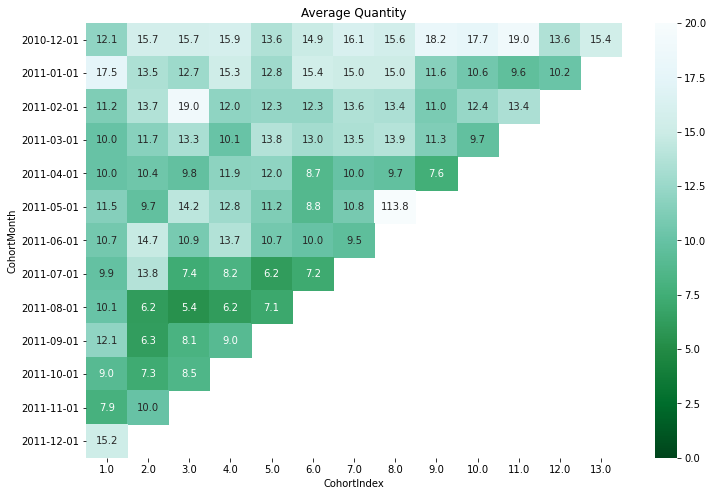

In [263]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
sns.heatmap(data=avg_quantity, annot=True, fmt='0.1f', ax =ax, vmin = 0.0, vmax = 20, cmap="BuGn_r")
ax.set_title('Average Quantity')
plt.show()

## RFM Analysis

### Concepts

- Recency, Frequency and Monetary Value Calculations

- Recency 
    - When was last order?
    - Number of days since last purchase/ last visit/ last login
    
- Frequency
    - Number of purchases in given period (3 - 6 or 12 months)
    - How many or how often customer used the product of company
    - Bigger Value => More engaged customer
    - Not VIP [ Need to associate to monetary value for that]
    
- Monetary
    - Total amount of money spent in period selected above
    - Differentiate between MVP/ VIP
    
![RFM](http://d35fo82fjcw0y8.cloudfront.net/2018/03/01013508/Incontent_image.png)

RFM values can be grouped in several ways :-
- Percentiles eg quantiles
- Pareto 80/20 Cut
- Custom based on business Knowledge


For percentile implementation 
- Sort customers based on that metric
- Break customers into a pre defined number of groups of equal size
- Assign a label to each group

### RFM Calculations

In [339]:
df['TotalSum'] = df['UnitPrice']*df['Quantity']
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country InvoiceMonth  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom   2010-12-01   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom   2010-12-01   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   2010-12-01   

  CohortMonth  CohortIndex  TotalSum  
0  2010-12-01          1.0     15.30  
1  2010-12-01          1.0     20.34  
2  2010-12-01          1.0     22.00  
3  2010-12-01          1.0     20.34  
4  2010-12-01          1.0     20.34

In [266]:
df.InvoiceDate.dt.date.min(), df.InvoiceDate.dt.date.max()

(datetime.date(2010, 12, 1), datetime.date(2011, 12, 9))

In real world, 

- We would work with most recent snapshot of day from today or yesterday

In [267]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [268]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [291]:
rfm = df.groupby(['CustomerID'])\
.agg({'InvoiceDate': lambda x : (snapshot_date - x.max()).days,
      'InvoiceNo': 'count', 
      'TotalSum': 'sum'})

# rfm = df.groupby(['CustomerID'])\
# .agg({'Recency': lambda x : (snapshot_date - x.max()).days,
#       'Frequency': 'count', 
#       'MonetaryValue': 'sum'})
rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalSum': 'MonetaryValue'},
           inplace = True,
        )

rfm

Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0       326.0          1       77183.60
12347.0         2.0        182        4310.00
12348.0        75.0         31        1797.24
12349.0        19.0         73        1757.55
12350.0       310.0         17         334.40
...             ...        ...            ...
18280.0       278.0         10         180.60
18281.0       181.0          7          80.82
18282.0         8.0         12         178.05
18283.0         4.0        721        2045.53
18287.0        43.0         70        1837.28

[4372 rows x 3 columns]

```{tip}

- Recency 
    - Better rating to customer who have been active more recently

- Frequency & Monetary Value
    - Different rating / higher label (than above)-we want to spend more money & visit more often
    
    
Now let's see the magic happen
```

### RFM Segments

In [292]:
list(range(4,0,-1)), list(range(1,5))

([4, 3, 2, 1], [1, 2, 3, 4])

In [293]:
r_labels = range(4, 0, -1)
f_labels = range(1,5)
m_labels = range(1,5)

r_labels, f_labels, m_labels

(range(4, 0, -1), range(1, 5), range(1, 5))

In [294]:
pd.qcut(list(range(1,101)), q=4, labels=r_labels)

[4, 4, 4, 4, 4, ..., 1, 1, 1, 1, 1]
Length: 100
Categories (4, int64): [4 < 3 < 2 < 1]

In [295]:
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
r_quartiles

CustomerID
12346.0    1
12347.0    4
12348.0    2
12349.0    3
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    4
18283.0    4
18287.0    3
Name: Recency, Length: 4372, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [296]:
f_quartiles = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
f_quartiles

CustomerID
12346.0    1
12347.0    4
12348.0    2
12349.0    3
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    1
18283.0    4
18287.0    3
Name: Frequency, Length: 4372, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [297]:
m_quartiles = pd.qcut(rfm['MonetaryValue'], q=4, labels=m_labels)
m_quartiles

CustomerID
12346.0    4
12347.0    4
12348.0    4
12349.0    4
12350.0    2
          ..
18280.0    1
18281.0    1
18282.0    1
18283.0    4
18287.0    4
Name: MonetaryValue, Length: 4372, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [298]:
rfm = rfm.assign(R=r_quartiles, F=f_quartiles, M=m_quartiles)
rfm

Recency  Frequency  MonetaryValue  R  F  M
CustomerID                                            
12346.0       326.0          1       77183.60  1  1  4
12347.0         2.0        182        4310.00  4  4  4
12348.0        75.0         31        1797.24  2  2  4
12349.0        19.0         73        1757.55  3  3  4
12350.0       310.0         17         334.40  1  1  2
...             ...        ...            ... .. .. ..
18280.0       278.0         10         180.60  1  1  1
18281.0       181.0          7          80.82  1  1  1
18282.0         8.0         12         178.05  4  1  1
18283.0         4.0        721        2045.53  4  4  4
18287.0        43.0         70        1837.28  3  3  4

[4372 rows x 6 columns]

In [310]:
# rfm['RFMSegment'] = pd.to_numeric(rfm.R, downcast='integer').astype('str') +\
#                 pd.to_numeric(rfm.F, downcast='integer').astype('str')+\
#                 pd.to_numeric(rfm.M, downcast='integer').astype('str')



rfm.info()

# def str_val(x):
#     return str(int(x['R']))+str(x['F'])+str(x['M'])
# rfm['RFMSegment'] = rfm.apply(str_val, axis=1)
# rfm

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4372 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        4338 non-null   float64 
 1   Frequency      4372 non-null   int64   
 2   MonetaryValue  4372 non-null   float64 
 3   R              4338 non-null   category
 4   F              4372 non-null   category
 5   M              4372 non-null   category
 6   RFMSegment     4372 non-null   object  
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 352.5+ KB


In [312]:
rfm[rfm.isnull()]

Recency  Frequency  MonetaryValue    R    F    M RFMSegment
CustomerID                                                             
12346.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
12347.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
12348.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
12349.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
12350.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
...             ...        ...            ...  ...  ...  ...        ...
18280.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
18281.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
18282.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
18283.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN
18287.0         NaN        NaN            NaN  NaN  NaN  NaN        NaN

[4372 rows x 7 columns]

In [314]:
rfm = rfm.dropna()

In [316]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 4338 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        4338 non-null   float64 
 1   Frequency      4338 non-null   int64   
 2   MonetaryValue  4338 non-null   float64 
 3   R              4338 non-null   category
 4   F              4338 non-null   category
 5   M              4338 non-null   category
 6   RFMSegment     4338 non-null   object  
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 351.3+ KB


In [340]:
rfm['RFMSegment'] = pd.to_numeric(rfm.R, downcast='integer').astype('str') +\
                pd.to_numeric(rfm.F, downcast='integer').astype('str')+\
                pd.to_numeric(rfm.M, downcast='integer').astype('str')
rfm

Recency  Frequency  MonetaryValue  R  F  M RFMSegment  RFMScore
CustomerID                                                                 
12346.0       326.0          1       77183.60  1  1  4        114         6
12347.0         2.0        182        4310.00  4  4  4        444        12
12348.0        75.0         31        1797.24  2  2  4        224         8
12349.0        19.0         73        1757.55  3  3  4        334        10
12350.0       310.0         17         334.40  1  1  2        112         4
...             ...        ...            ... .. .. ..        ...       ...
18280.0       278.0         10         180.60  1  1  1        111         3
18281.0       181.0          7          80.82  1  1  1        111         3
18282.0         8.0         12         178.05  4  1  1        411         6
18283.0         4.0        721        2045.53  4  4  4        444        12
18287.0        43.0         70        1837.28  3  3  4        334        10

[4338 rows x 8 columns]

In [341]:
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm

Recency  Frequency  MonetaryValue  R  F  M RFMSegment  RFMScore
CustomerID                                                                 
12346.0       326.0          1       77183.60  1  1  4        114         6
12347.0         2.0        182        4310.00  4  4  4        444        12
12348.0        75.0         31        1797.24  2  2  4        224         8
12349.0        19.0         73        1757.55  3  3  4        334        10
12350.0       310.0         17         334.40  1  1  2        112         4
...             ...        ...            ... .. .. ..        ...       ...
18280.0       278.0         10         180.60  1  1  1        111         3
18281.0       181.0          7          80.82  1  1  1        111         3
18282.0         8.0         12         178.05  4  1  1        411         6
18283.0         4.0        721        2045.53  4  4  4        444        12
18287.0        43.0         70        1837.28  3  3  4        334        10

[4338 rows x 8 columns]

### Analyzing Segments

In [342]:
rfm.groupby(['RFMSegment']).size().sort_values(ascending=False)

RFMSegment
444    451
111    374
344    217
122    202
211    175
      ... 
124      7
314      7
414      6
142      3
441      3
Length: 61, dtype: int64

### Filtering RFM Segments

In [343]:
rfm[rfm['RFMSegment'] =='111'].head()

Recency  Frequency  MonetaryValue  R  F  M RFMSegment  RFMScore
CustomerID                                                                 
12353.0       204.0          4          89.00  1  1  1        111         3
12361.0       287.0         10         189.90  1  1  1        111         3
12401.0       303.0          5          84.30  1  1  1        111         3
12402.0       323.0         11         225.60  1  1  1        111         3
12441.0       367.0         11         173.55  1  1  1        111         3

### Summary Metrics RFMScore

In [344]:
rfm.groupby('RFMScore').agg({'Recency': 'mean',
                             'Frequency': 'mean',
                             'MonetaryValue':['mean','count']
                            }).round(1)

Recency Frequency MonetaryValue      
            mean      mean          mean count
RFMScore                                      
3          261.4       8.1         154.7   374
4          177.4      13.5         238.7   386
5          153.3      20.8         363.8   515
6           98.0      27.6         815.9   460
7           81.2      38.0         762.4   453
8           64.1      55.7         972.0   463
9           46.2      78.0        1787.7   415
10          32.5     109.9        2045.6   430
11          21.2     185.2        4034.2   391
12           7.2     368.0        9269.0   451

### Segmentation based on RFM Score

In [345]:
def segments(x):
    if x['RFMScore'] > 9:
        return "GOLD"
    elif (x['RFMScore'] > 5) and (x['RFMScore'] <= 9):
        return "SILVER"
    else:
        return "BRONZE"
    
rfm['RFMSegment'] = rfm.apply(segments, axis=1)

rfm

Recency  Frequency  MonetaryValue  R  F  M RFMSegment  RFMScore
CustomerID                                                                 
12346.0       326.0          1       77183.60  1  1  4     SILVER         6
12347.0         2.0        182        4310.00  4  4  4       GOLD        12
12348.0        75.0         31        1797.24  2  2  4     SILVER         8
12349.0        19.0         73        1757.55  3  3  4       GOLD        10
12350.0       310.0         17         334.40  1  1  2     BRONZE         4
...             ...        ...            ... .. .. ..        ...       ...
18280.0       278.0         10         180.60  1  1  1     BRONZE         3
18281.0       181.0          7          80.82  1  1  1     BRONZE         3
18282.0         8.0         12         178.05  4  1  1     SILVER         6
18283.0         4.0        721        2045.53  4  4  4       GOLD        12
18287.0        43.0         70        1837.28  3  3  4       GOLD        10

[4338 rows x 8 columns]

In [347]:
rfm.groupby('RFMSegment').agg({'Recency': 'mean',
                             'Frequency': 'mean',
                             'MonetaryValue':['mean','count']
                            }).round(1)

Recency Frequency MonetaryValue      
              mean      mean          mean count
RFMSegment                                      
BRONZE       192.3      14.9         264.6  1275
GOLD          20.1     224.5        5218.0  1272
SILVER        73.0      49.2        1067.9  1791

## Segmentation using KMeans

```{admonition} Attention
:class: warning
        
- Symmetric distribution of variables(not skewed)
- Variables with same average values
- Variables with same variance

```

In [350]:
rfm[['Recency', 'Frequency', 'MonetaryValue']].describe()

Recency    Frequency  MonetaryValue
count  4338.000000  4338.000000    4338.000000
mean     92.536422    90.523744    2048.688081
std     100.014169   225.506968    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.482500
50%      51.000000    41.000000     668.570000
75%     142.000000    98.000000    1660.597500
max     374.000000  7676.000000  280206.020000

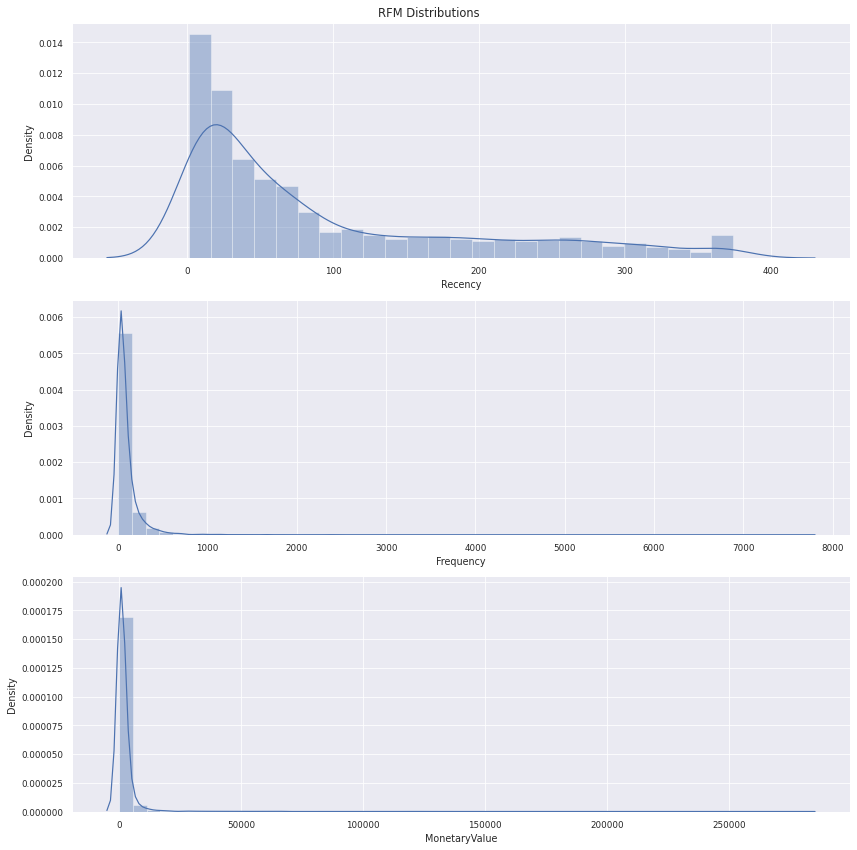

In [360]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12,12))
(ax1, ax2, ax3) = axes

sns.distplot(rfm.Recency, label='Recency', ax= ax1)
sns.distplot(rfm.Frequency, label='Frequency', ax= ax2)
sns.distplot(rfm.MonetaryValue, label='MonetaryValue', ax= ax3)
plt.suptitle("RFM Distributions")
# plt.style.use('ggplot')
sns.set_theme()
sns.set_context("paper")
plt.tight_layout()
plt.show()

```{admonition} Review
- From above table and figures
- Mean of Recency & Frequency close ; Monetary Value vastly different
- Variances are very different

- Variable distribution is skewed 

What should we do to fix it?

Transform and Scale the variables

- Unskew the data using log transformation
- Scale to same standard deviation
- Store as a separate array to be used for clustering
```

### Fixing distributions

In [368]:
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis=1).round(3); rfm_log

Recency  Frequency  MonetaryValue
CustomerID                                   
12346.0       5.787      0.000         11.254
12347.0       0.693      5.204          8.369
12348.0       4.317      3.434          7.494
12349.0       2.944      4.290          7.472
12350.0       5.737      2.833          5.812
...             ...        ...            ...
18280.0       5.628      2.303          5.196
18281.0       5.198      1.946          4.392
18282.0       2.079      2.485          5.182
18283.0       1.386      6.581          7.623
18287.0       3.761      4.248          7.516

[4338 rows x 3 columns]

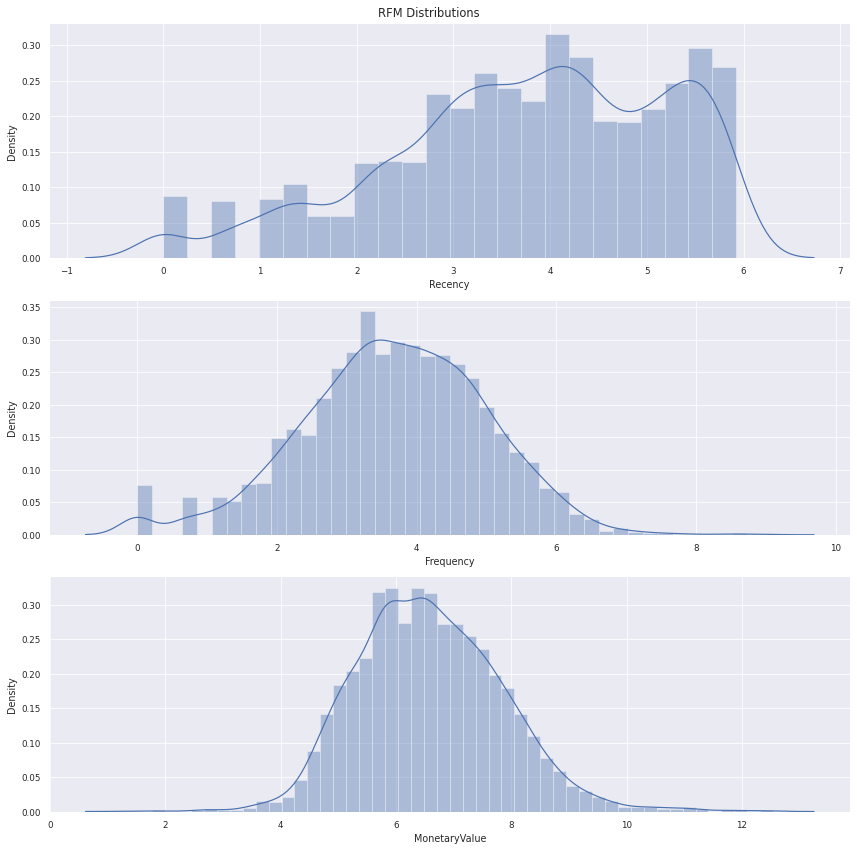

In [369]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12,12))
(ax1, ax2, ax3) = axes

sns.distplot(rfm_log.Recency, label='Recency', ax= ax1)
sns.distplot(rfm_log.Frequency, label='Frequency', ax= ax2)
sns.distplot(rfm_log.MonetaryValue, label='MonetaryValue', ax= ax3)
plt.suptitle("RFM Distributions")
# plt.style.use('ggplot')
sns.set_theme()
sns.set_context("paper")
plt.tight_layout()
plt.show()

In [401]:
log_transformer = FunctionTransformer(np.log)

In [418]:
rfm_log = log_transformer.fit_transform((rfm[['Recency', 'Frequency', 'MonetaryValue']])); rfm_log

Recency  Frequency  MonetaryValue
CustomerID                                    
12346.0     5.786897   0.000000      11.253942
12347.0     0.693147   5.204007       8.368693
12348.0     4.317488   3.433987       7.494007
12349.0     2.944439   4.290459       7.471676
12350.0     5.736572   2.833213       5.812338
...              ...        ...            ...
18280.0     5.627621   2.302585       5.196285
18281.0     5.198497   1.945910       4.392224
18282.0     2.079442   2.484907       5.182064
18283.0     1.386294   6.580639       7.623412
18287.0     3.761200   4.248495       7.516041

[4338 rows x 3 columns]

In [402]:
sc = StandardScaler()

In [419]:
rfm_normalized = sc.fit_transform(rfm_log); rfm_normalized

array([[ 1.40989446, -2.77997755,  3.70020082],
       [-2.14649825,  1.16035591,  1.41325634],
       [ 0.38397128, -0.17985509,  0.7199513 ],
       ...,
       [-1.17860486, -0.89847328, -1.11257171],
       [-1.66255156,  2.20270486,  0.82252182],
       [-0.00442205,  0.43686843,  0.73741623]])

In [420]:
model = KMeans(n_clusters=3, max_iter=300, random_state=None)

In [421]:
model.fit_predict(rfm_normalized)

array([0, 2, 0, ..., 1, 2, 0], dtype=int32)

In [413]:
# pipeline = Pipeline([('lt', log_transformer), ('sc', sc), ('model', model)])

In [414]:
# pipeline.fit((rfm[['Recency', 'Frequency', 'MonetaryValue']]))

In [422]:
rfm['K_Cluster'] = model.fit_predict(rfm_normalized)

In [423]:
rfm

Recency  Frequency  MonetaryValue  R  F  M RFMSegment  RFMScore  \
CustomerID                                                                    
12346.0       326.0          1       77183.60  1  1  4     SILVER         6   
12347.0         2.0        182        4310.00  4  4  4       GOLD        12   
12348.0        75.0         31        1797.24  2  2  4     SILVER         8   
12349.0        19.0         73        1757.55  3  3  4       GOLD        10   
12350.0       310.0         17         334.40  1  1  2     BRONZE         4   
...             ...        ...            ... .. .. ..        ...       ...   
18280.0       278.0         10         180.60  1  1  1     BRONZE         3   
18281.0       181.0          7          80.82  1  1  1     BRONZE         3   
18282.0         8.0         12         178.05  4  1  1     SILVER         6   
18283.0         4.0        721        2045.53  4  4  4       GOLD        12   
18287.0        43.0         70        1837.28  3  3  4       GOLD        10   

            K_Cluster  
CustomerID             
12346.0             0  
12347.0             1  
12348.0             0  
12349.0             0  
12350.0             2  
...               ...  
18280.0             2  
18281.0             2  
18282.0             2  
18283.0             1  
18287.0             0  

[4338 rows x 9 columns]

### Determining Clusters

In [431]:
def score(n_clusters, X):
    km = KMeans(n_clusters=n_clusters, max_iter=300, random_state=None)
#     X = df[features]
    labels = km.fit_predict(X)
    SSE = km.inertia_
    Silhouette = metrics.silhouette_score(X, labels)
    CHS = metrics.calinski_harabasz_score(X, labels)
    DBS = metrics.davies_bouldin_score(X, labels)
    return {'SSE':SSE, 'Silhouette': Silhouette, 'Calinski_Harabasz': CHS, 'Davies_Bouldin':DBS, 'model':km}

In [432]:
rfm_normalized

array([[ 1.40989446, -2.77997755,  3.70020082],
       [-2.14649825,  1.16035591,  1.41325634],
       [ 0.38397128, -0.17985509,  0.7199513 ],
       ...,
       [-1.17860486, -0.89847328, -1.11257171],
       [-1.66255156,  2.20270486,  0.82252182],
       [-0.00442205,  0.43686843,  0.73741623]])

In [433]:
score(3,rfm_normalized)

{'SSE': 5314.652651827099,
 'Silhouette': 0.30360827075999475,
 'Calinski_Harabasz': 3140.104478514454,
 'Davies_Bouldin': 1.0979475974673056,
 'model': KMeans(n_clusters=3)}

In [438]:
df_cluster_scorer = pd.DataFrame()
df_cluster_scorer['n_clusters'] = list(range(2, 21))

df_cluster_scorer['SSE'],df_cluster_scorer['Silhouette'],\
df_cluster_scorer['Calinski_Harabasz'], df_cluster_scorer['Davies_Bouldin'],\
df_cluster_scorer['model'] = zip(*df_cluster_scorer['n_clusters'].map(lambda row: score(row, rfm_normalized).values()))

df_cluster_scorer

n_clusters          SSE  Silhouette  Calinski_Harabasz  Davies_Bouldin  \
0            2  6883.800570    0.394879        3861.338471        0.949330   
1            3  5314.671090    0.303543        3140.098839        1.098187   
2            4  4440.249606    0.303142        2789.571405        1.058351   
3            5  3766.516448    0.278121        2659.604851        1.086998   
4            6  3367.186319    0.276715        2482.219740        1.063290   
5            7  3047.059671    0.264630        2361.143844        1.023636   
6            8  2802.571223    0.263357        2253.840597        1.054314   
7            9  2628.342146    0.251287        2138.234736        1.066557   
8           10  2462.012036    0.257576        2061.071283        1.045072   
9           11  2306.640989    0.265960        2008.595889        1.067603   
10          12  2156.386502    0.262470        1980.195815        1.023627   
11          13  2030.706747    0.262547        1949.364270        1.019886   
12          14  1941.866359    0.261126        1896.532025        1.030465   
13          15  1866.874811    0.252259        1843.774752        1.060838   
14          16  1796.873081    0.251948        1798.720522        1.044352   
15          17  1736.265898    0.239702        1754.171350        1.059899   
16          18  1681.586609    0.252776        1712.559874        1.070504   
17          19  1621.520791    0.258585        1685.825098        1.047598   
18          20  1576.767425    0.238955        1648.490285        1.094423   

                    model  
0    KMeans(n_clusters=2)  
1    KMeans(n_clusters=3)  
2    KMeans(n_clusters=4)  
3    KMeans(n_clusters=5)  
4    KMeans(n_clusters=6)  
5    KMeans(n_clusters=7)  
6                KMeans()  
7    KMeans(n_clusters=9)  
8   KMeans(n_clusters=10)  
9   KMeans(n_clusters=11)  
10  KMeans(n_clusters=12)  
11  KMeans(n_clusters=13)  
12  KMeans(n_clusters=14)  
13  KMeans(n_clusters=15)  
14  KMeans(n_clusters=16)  
15  KMeans(n_clusters=17)  
16  KMeans(n_clusters=18)  
17  KMeans(n_clusters=19)  
18  KMeans(n_clusters=20)

array([<AxesSubplot:xlabel='n_clusters'>,
       <AxesSubplot:xlabel='n_clusters'>,
       <AxesSubplot:xlabel='n_clusters'>,
       <AxesSubplot:xlabel='n_clusters'>], dtype=object)

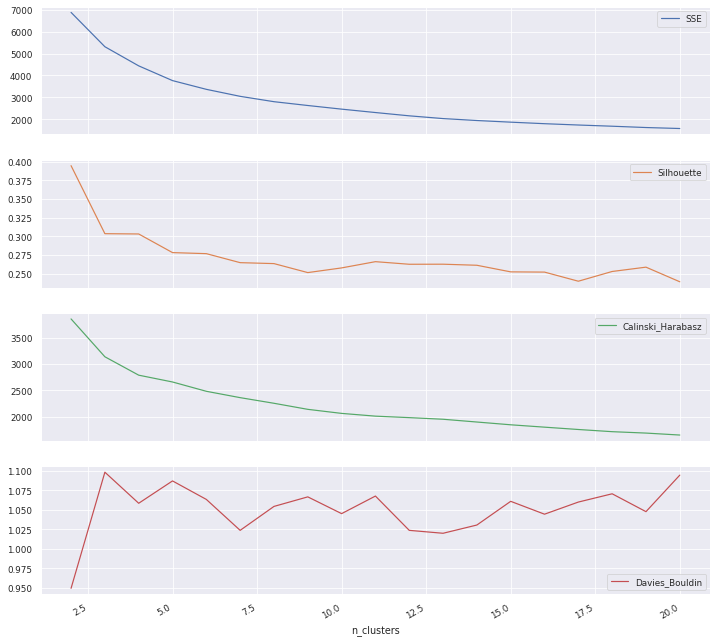

In [439]:
df_cluster_scorer.plot.line(subplots=True,x ='n_clusters', figsize=(12,12))

<AxesSubplot:xlabel='n_clusters'>

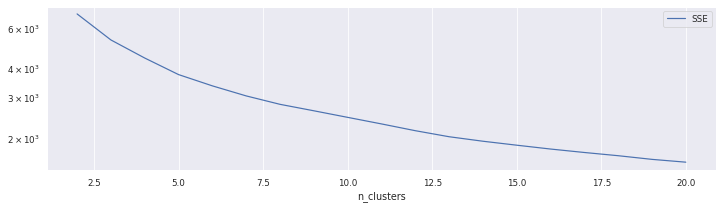

In [440]:
df_cluster_scorer.plot.line(y='SSE',x ='n_clusters',logy=True, figsize=(12,3))

In [443]:
pca = PCA(n_components=2, whiten=True)

# pca.fit_transform(rfm_normalized)

rfm['x'], rfm['y'] = zip(*(pca.fit_transform(rfm_normalized)))

In [444]:
rfm.head().T

CustomerID      12346.0  12347.0    12348.0    12349.0   12350.0
Recency             326        2         75         19       310
Frequency             1      182         31         73        17
MonetaryValue   77183.6     4310    1797.24    1757.55     334.4
R                     1        4          2          3         1
F                     1        4          2          3         1
M                     4        4          4          4         2
RFMSegment       SILVER     GOLD     SILVER       GOLD    BRONZE
RFMScore              6       12          8         10         4
K_Cluster             0        1          0          0         2
x             -0.107924  1.80756  0.0907543   0.683463 -0.991831
y              -2.03436  1.19585  -0.684388  0.0950318 -0.953282

In [460]:
rfm.groupby('K_Cluster').agg({'Recency': 'mean',
                             'Frequency': 'mean',
                             'MonetaryValue':['mean','count']
                            }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0            69.1      65.2        1164.3  1855
1            13.2     259.1        6536.1   961
2           171.3      14.9         293.2  1522

### Visualization

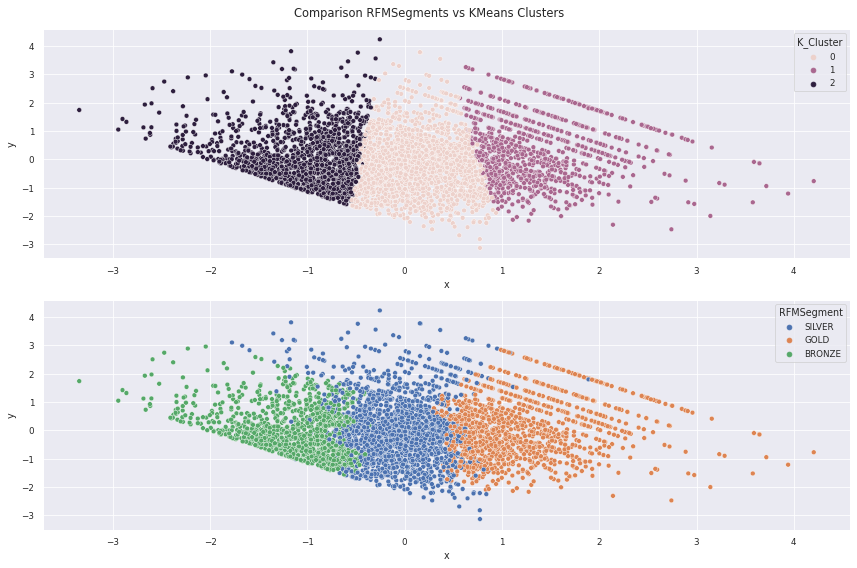

In [461]:
# plt.scatter(rfm['x'], rfm['y'], c=rfm['K_Cluster'])
# # plt.scatter(rfm['x'], rfm['y'], c=rfm['RFMSegment'])
# # plt.show()
# plt.legend()
# plt.show()
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.scatterplot(data=rfm, x="x", y="y", hue='K_Cluster', ax=ax1)
sns.scatterplot(data=rfm, x="x", y="y", hue='RFMSegment', ax=ax2)
plt.suptitle("Comparison RFMSegments vs KMeans Clusters")
plt.tight_layout()
plt.show()

### Comparing and Understanding Different Segments

Snake Plot

- Market research technique to compare different segment

- Visual representation of each segment's attributes

- Need data normalization (centering and scaling)

- Plot each cluster's average normalized value of each attribute

In [462]:
rfm

Recency  Frequency  MonetaryValue  R  F  M RFMSegment  RFMScore  \
CustomerID                                                                    
12346.0       326.0          1       77183.60  1  1  4     SILVER         6   
12347.0         2.0        182        4310.00  4  4  4       GOLD        12   
12348.0        75.0         31        1797.24  2  2  4     SILVER         8   
12349.0        19.0         73        1757.55  3  3  4       GOLD        10   
12350.0       310.0         17         334.40  1  1  2     BRONZE         4   
...             ...        ...            ... .. .. ..        ...       ...   
18280.0       278.0         10         180.60  1  1  1     BRONZE         3   
18281.0       181.0          7          80.82  1  1  1     BRONZE         3   
18282.0         8.0         12         178.05  4  1  1     SILVER         6   
18283.0         4.0        721        2045.53  4  4  4       GOLD        12   
18287.0        43.0         70        1837.28  3  3  4       GOLD        10   

            K_Cluster         x         y  
CustomerID                                 
12346.0             0 -0.107924 -2.034364  
12347.0             1  1.807565  1.195854  
12348.0             0  0.090754 -0.684388  
12349.0             0  0.683463  0.095032  
12350.0             2 -0.991831 -0.953282  
...               ...       ...       ...  
18280.0             2 -1.334170 -0.453675  
18281.0             2 -1.606353  0.304837  
18282.0             2 -0.425600  2.252207  
18283.0             1  1.827859  0.453958  
18287.0             0  0.487800 -0.543167  

[4338 rows x 11 columns]

In [463]:
rfm_normalized.shape

(4338, 3)

In [515]:
df_rfm_normalized = pd.DataFrame(rfm_normalized, index=rfm.index, columns =[['Recency', 'Frequency', 'MonetaryValue']])
df_rfm_normalized['K_Cluster'] = rfm['K_Cluster']
df_rfm_normalized['RFMSegment'] = rfm['RFMSegment']
df_rfm_normalized.reset_index(inplace=True)
df_rfm_normalized

CustomerID   Recency Frequency MonetaryValue K_Cluster RFMSegment
0       12346.0  1.409894 -2.779978      3.700201         0     SILVER
1       12347.0 -2.146498  1.160356      1.413256         1       GOLD
2       12348.0  0.383971 -0.179855      0.719951         0     SILVER
3       12349.0 -0.574674  0.468643      0.702251         0       GOLD
4       12350.0  1.374758 -0.634745     -0.612996         2     BRONZE
...         ...       ...       ...           ...       ...        ...
4333    18280.0  1.298690 -1.036522     -1.101300         2     BRONZE
4334    18281.0  0.999081 -1.306587     -1.738625         2     BRONZE
4335    18282.0 -1.178605 -0.898473     -1.112572         2     SILVER
4336    18283.0 -1.662552  2.202705      0.822522         1       GOLD
4337    18287.0 -0.004422  0.436868      0.737416         0       GOLD

[4338 rows x 6 columns]

In [516]:
df_rfm_normalized.columns= [a[0] for a in df_rfm_normalized.columns.tolist()]

In [517]:
df_rfm_normalized.columns

Index(['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'K_Cluster',
       'RFMSegment'],
      dtype='object')

In [520]:
df_rfm_melt = pd.melt(df_rfm_normalized, 
                      id_vars=['CustomerID', 'K_Cluster', 'RFMSegment'],
                      value_vars=['Recency', 'Frequency', 'MonetaryValue'],
                      value_name = 'Value',
                      var_name = 'Metric'
                     )

df_rfm_melt

CustomerID  K_Cluster RFMSegment         Metric     Value
0        12346.0          0     SILVER        Recency  1.409894
1        12347.0          1       GOLD        Recency -2.146498
2        12348.0          0     SILVER        Recency  0.383971
3        12349.0          0       GOLD        Recency -0.574674
4        12350.0          2     BRONZE        Recency  1.374758
...          ...        ...        ...            ...       ...
13009    18280.0          2     BRONZE  MonetaryValue -1.101300
13010    18281.0          2     BRONZE  MonetaryValue -1.738625
13011    18282.0          2     SILVER  MonetaryValue -1.112572
13012    18283.0          1       GOLD  MonetaryValue  0.822522
13013    18287.0          0       GOLD  MonetaryValue  0.737416

[13014 rows x 5 columns]

In [521]:
df_rfm_melt2 = pd.melt(df_rfm_melt, 
                      id_vars=['CustomerID', 'Metric', 'Value'],
                      value_vars=['K_Cluster', 'RFMSegment'],
                      value_name='ClusterName',
                      var_name='ClusterType')
df_rfm_melt2

CustomerID         Metric     Value ClusterType ClusterName
0        12346.0        Recency  1.409894   K_Cluster           0
1        12347.0        Recency -2.146498   K_Cluster           1
2        12348.0        Recency  0.383971   K_Cluster           0
3        12349.0        Recency -0.574674   K_Cluster           0
4        12350.0        Recency  1.374758   K_Cluster           2
...          ...            ...       ...         ...         ...
26023    18280.0  MonetaryValue -1.101300  RFMSegment      BRONZE
26024    18281.0  MonetaryValue -1.738625  RFMSegment      BRONZE
26025    18282.0  MonetaryValue -1.112572  RFMSegment      SILVER
26026    18283.0  MonetaryValue  0.822522  RFMSegment        GOLD
26027    18287.0  MonetaryValue  0.737416  RFMSegment        GOLD

[26028 rows x 5 columns]

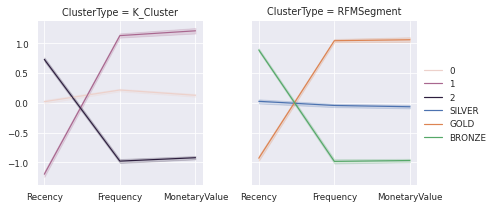

In [547]:
g = sns.FacetGrid(df_rfm_melt2, col='ClusterType')
g.map_dataframe(sns.lineplot, x="Metric", y="Value", hue='ClusterName', legend='brief')
g.add_legend()

Relative Importance of segment attributes

- Identify relative importance of each segment attribute
- Calculate avg values of each clust
- Calculate avg values of population
- Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)

In [553]:
cluster_avg = rfm.groupby('K_Cluster').mean();
cluster_avg

Recency   Frequency  MonetaryValue   RFMScore         x  \
K_Cluster                                                               
0           69.052291   65.239353    1164.318217   8.095957  0.135688   
1           13.169615  259.093652    6536.055567  11.264308  1.384201   
2          171.271353   14.904074     293.199212   4.455322 -1.039368   

                  y  
K_Cluster            
0         -0.182712  
1          0.246466  
2          0.067068

In [554]:
population_avg= rfm.mean()
population_avg

Recency          9.253642e+01
Frequency        9.052374e+01
MonetaryValue    2.048688e+03
RFMScore         7.520516e+00
K_Cluster        9.232365e-01
x                2.293130e-17
y                1.965540e-17
dtype: float64

In [568]:
cluster_avg = rfm.groupby('K_Cluster').mean();
population_avg= rfm.mean()
relative_imp = cluster_avg/population_avg -1
relative_imp = relative_imp[['Recency', 'Frequency', 'MonetaryValue']].round(2)
relative_imp

Recency  Frequency  MonetaryValue
K_Cluster                                   
0            -0.25      -0.28          -0.43
1            -0.86       1.86           2.19
2             0.85      -0.84          -0.86

In [570]:
cluster_avg = rfm.groupby('RFMSegment').mean()
population_avg= rfm.mean()
prop_rfm = cluster_avg/population_avg -1
prop_rfm

Recency  Frequency  MonetaryValue  RFMScore  K_Cluster  \
RFMSegment                                                            
BRONZE      1.078088  -0.835441      -0.870851 -0.453417   1.128913   
GOLD       -0.783147   1.480533       1.546985  0.464861  -0.204671   
SILVER     -0.211278  -0.456756      -0.478744 -0.007368  -0.658304   

                       x             y  
RFMSegment                              
BRONZE     -4.864229e+16 -4.335882e+15  
GOLD        5.205352e+16  2.880894e+15  
SILVER     -2.341240e+15  1.040621e+15

In [572]:
cluster_avg = rfm.groupby('RFMSegment').mean();
population_avg= rfm.mean()
prop_rfm = cluster_avg/population_avg -1
prop_rfm  = prop_rfm[['Recency', 'Frequency', 'MonetaryValue']].round(2)
prop_rfm 

Recency  Frequency  MonetaryValue
RFMSegment                                   
BRONZE         1.08      -0.84          -0.87
GOLD          -0.78       1.48           1.55
SILVER        -0.21      -0.46          -0.48

<AxesSubplot:ylabel='K_Cluster'>

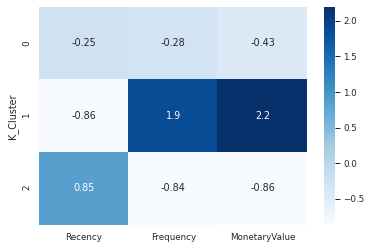

In [573]:
sns.heatmap(data=relative_imp, annot=True, cmap='Blues')

<AxesSubplot:ylabel='RFMSegment'>

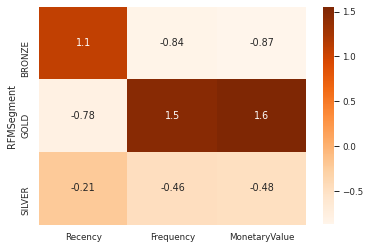

In [574]:
sns.heatmap(data=prop_rfm, annot=True, cmap='Oranges')

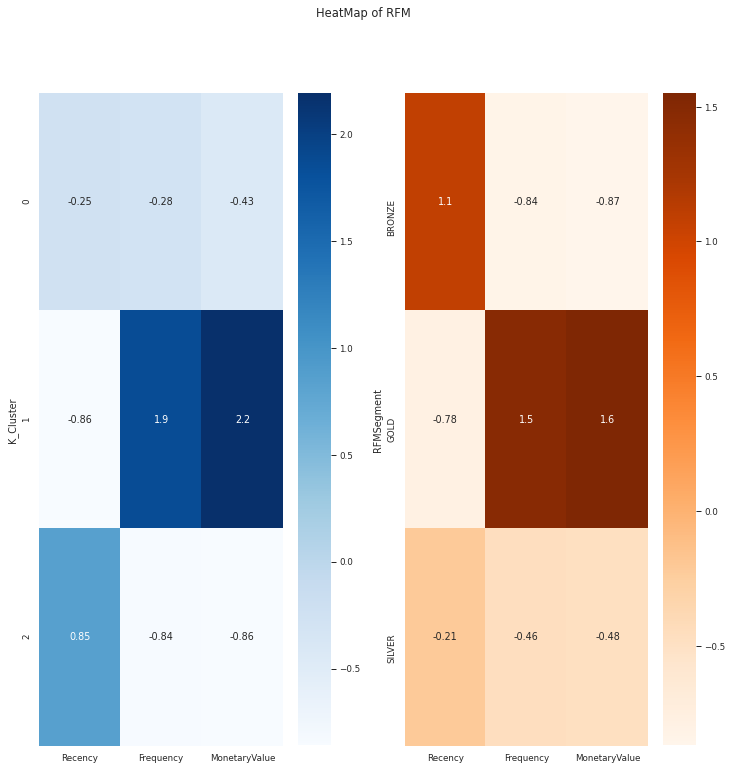

In [577]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,12) )
sns.heatmap(data=relative_imp, annot=True, cmap='Blues', ax=ax1)
sns.heatmap(data=prop_rfm, annot=True, cmap='Oranges',ax =ax2)
plt.suptitle("HeatMap of RFM")
plt.show()

Pending 

- Tenure in RFM : Time since first transaction(How long customer has been with the company)